# Building executables on unix-like systems
# Comandline compilation, configuration scripts and GNU Make

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compiling-source-code-on-the-command-line" data-toc-modified-id="Compiling-source-code-on-the-command-line-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compiling source code on the command line</a></span><ul class="toc-item"><li><span><a href="#Linking-and-object-files" data-toc-modified-id="Linking-and-object-files-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Linking and object files</a></span></li><li><span><a href="#Finding-header-files-and-libraries" data-toc-modified-id="Finding-header-files-and-libraries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Finding header files and libraries</a></span></li></ul></li><li><span><a href="#Makefiles" data-toc-modified-id="Makefiles-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Makefiles</a></span><ul class="toc-item"><li><span><a href="#The-basics-of-Makefiles" data-toc-modified-id="The-basics-of-Makefiles-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The basics of Makefiles</a></span></li><li><span><a href="#Use-of-variables" data-toc-modified-id="Use-of-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Use of variables</a></span></li><li><span><a href="#Implicit-and-explicit-Make-rules" data-toc-modified-id="Implicit-and-explicit-Make-rules-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Implicit and explicit Make rules</a></span></li><li><span><a href="#Wildcards,-substitutions-and-functions" data-toc-modified-id="Wildcards,-substitutions-and-functions-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Wildcards, substitutions and functions</a></span></li><li><span><a href="#Nested-make-calls" data-toc-modified-id="Nested-make-calls-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Nested make calls</a></span></li></ul></li></ul></div>

## Compiling source code on the command line

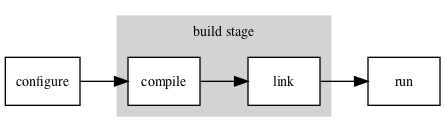
Unlike interpretted languages such as Python, compiled languages such as C & C++ require a stage in their use when text files (source code) are converted into binary executables, which may then be run repeatedly. While modern graphical IDEs such as Virtual Studio abstract this away into a "push-button" operation, under the hood the operation is essentially unchanged from its early days. A program called a compiler converts human readable text files one by one into instructions sequentially executable by the target machine. For Microsoft Virtual Studio these programs are called `Cl.exe` and `link.exe`.

The process can (in principal) happen simply by calling the compiler program yourself using the command line in a terminal(on Mac or Linux) or the command prompt (on windows). Lets have an example using a trivial 
"Hello World" program written in C.

`hello.c:`
```C
#include <stdio.h>
  
int main(int argc, char** argv){
  
  printf("Hello World!\n");
  
}
```

We can compile this on a unixlike system using the `cc` alias for the system C compiler.

In [4]:
cd example1
cc hello.c

On a unixlike system such as Linux or Mac OS, this will generate an output executable with the default name `a.out`. A similar call to `Cl.exe` would default to outputting a program  called `a.exe`. We can now run the program from the command line

In [5]:
./a.out

Hello World!


We've successfully compiled a simple program. We can set the name of the output file ourselves by passing the `-o <name>` option to the compiler.

In [6]:
cc hello.c -o hello
./hello

Hello World!


This was a trivial case with only one file, only refering to standard header files and functions. Things can quickly get more complicated.

### Linking and object files

Creating an exectuable actually has two stages. First the code in a "program unit" (i.e. a source file) has its variables and functions converted into machine executable chunks, then these chunks are all connected together. When writing large packages, most of your files will not contain a `main` function, so only need to be compiled and not linked. This is specified with the `-c` flag on compilers which follow the gnu standard. When finally linking your main, the other object files must be specified on the command line. You can either call the compiler again, or call the linker (e.g. `ld`) directly. When working with C++, you are strongly recommended to use the compiler, to ensure the C++ runtime libraries get linked in correctly.

```bash
cc file1.c -o file.o -c
cc file2.c file1.o -o myapp
```

### Finding header files and libraries

While compilers have hardcoded search paths for system header files, they must be instructed where to look for local ones. This is usually done with the `-I` flag. Similarly library search paths should be specified with `-L`, while the library name can be given as eg. `-lpng` for `libpng.so`. Alternatively you can just give the full path to the library file, just like it was another object file (normally _after_ the source file which makes use of them). 

```bash
cc -I/home/jrper/myapp/includes myapp.cpp -o myapp -L/home/jrper/lib -lapp
```

## Makefiles

### The basics of Makefiles

While individual compile commands could easily be placed into a shell script, it saves time if only things which have changed are recompiled, with existing code reused as much as possible. The GNU utility `make` attemps to automate this process, in order to minimise the time needed to rebuild code. The action of `make` is controlled by a text file called `Makefile`. This file consists of a list of targets to produce, the dependencies of those targets and a set of recipes to produce the target from the dependency list. When `make` is called on a target, it recursively generates targets which are older (by date stamp) than their dependencies, until it has built the target asked for.

Lets write a simple makefile for our single file program, in the same directory:

Makefile
```
hello: hello.c
    cc hello.c -o hello
```

We can then call make as `make hello` (or, since it's the _first_ line of the file, just `make`). 

This gives an idea of the basic syntax.

```
<target name>: [<dependency 1> [<dependency 2> ...]]
    <recipe line 1>
    [<recipe line 2>
    ...
```

##### A warning
Each line of a makefile recipe is processed in its own subshell (so that an error doesn't cause the whole system to collapse catastrophically). The most important result of this is that changing directoy with `cd` only affects the line tht it's written on, with subsequent lines reverting to the original working directory. As such, commands to be run in other places should be concatenated with the `&&` operator and/or have the `cd` command before every line.

### Use of variables

Just as with shell scripts, `make` allows for variables. These are assigned with the `=` operator (for variables which are expanded recursively), or the `:=` operator (for variables which only expand once). To make a reference to a variable in another line, use the `$()` or `${}` operators.

Variables are used to reduce repetition and to make it easier to modify makefiles by only needing to change one line, rather than many lines to update an option. As an example, lets specify the C++ compiler.

```
CXX = g++

hello: hello.cpp
    ${CXX} hello.cpp -o hello
```

Variables also be set in a number of other ways:
 - Variables are inherited from the environmen
 - Variables can be overloaded in the command line call `make CC=icc hello`.
 - Some variables are assigned automatically to make it easier to write implicit rules
 
### Implicit and explicit Make rules

The previous example contained an explicit rule to build the executable `hello`. It fully specified the names of the target and dependencies. However, make also allows for _implicit_ rules, using wildcard matching and variable expansion to create rules for entire patterns of filenames. For example, let's make a nice rule to turn any C source file (`.c` file) into an object file (a `.o` file)

```make
CC = gcc

%.o: %.c
    $(CC) -c $(CFLAGS) $(CPPFLAGS) $< -o $@
```

The pattern matching means that the stem matching on the target left (e.g. the `hello` in `hello.o`) is substituted in the dependency name on the right (i.e `hello.o`). Here `$<` is an automatic variable which is replaced with the name of the first dependency, and `$@` is an automatic variable replaced with the name of the target.


### Wildcards, substitutions and functions

As you will have seen, makefiles are primarily based on processing lists of filenames and similar strings. As such it has developed to include a large numbers of features and functions to process and generate these. The syntax for a make function is usually very similar to a variable

```
$( <function name> <arg>[,arg2,..}) 
```

Lets write a (very) generic makefile to build a C application with a common directory structure.

```make
CC = gcc
CFLAGS += -I./include

FILES = $( wildcard src/*.c )
OBJS = $(FILES:%.c=%.o)
HEADERS = $( wildcard include/*.h )

%.o: %.c $(HEADERS)
    $(CC) -c $(CFLAGS) $(CPPFLAGS) $< -o $@
    
myapp: $(OBJS)
    $(CC) -c $(CFLAGS) $(CPPFLAGS) $^ main.c -o $@
```

### Nested make calls

Large, complex projects tend to end up with large, complex structures for their files. As such, it can sometimes
 make sense to nest layers of makefiles. The configuration system CMake takes this to extremes, often featuring three or four layers of makefiles. To chain nested makefiles, one can just add a call to make inside the recipe for a target. Note that because of the subshell issue, you must either use the `-C` option to specify the new working directory, or just connect the `cd` and make commands as a one-liner using the `&&` shell operator as with other commands.
 
```
my_sub_app:
    $(MAKE) -C ./src 
```

or

```
my_sub_app:
    cd src && $(MAKE)  
```